# Imersão de Dados 4 - Alura - Aula 1

## 1. Read dataset

In [ ]:
import pandas as pd

In [ ]:
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
data = pd.read_csv(url)

In [ ]:
data.shape

(10008, 8)

In [ ]:
data.head(3)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000


In [ ]:
# Get three random lines
data.sample(3)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
8833,NaN,Vila Cruzeiro,São Paulo,133,3,2,1,R$ 950.000
9010,Rua Coronel Irlandino Sandoval,Jardim Paulistano,São Paulo,390,4,2,5,R$ 5.050.000
8056,Rua Feliciano Maia,Jardim Paulista,São Paulo,605,5,4,10,R$ 30.000\n /Mês


## 2. Get dataset info

In [ ]:
type(data["Rua"])

pandas.core.series.Series

In [ ]:
# Some functions also work over the dataset columns
data["Rua"].sample(3)

607                           NaN
5294         Rua Amaro Cavalheiro
3539    Rua Doutor Avelino Chaves
Name: Rua, dtype: object

In [ ]:
type(data["Rua"][0])

str

In [ ]:
data["Rua"][0]

'Avenida Itacira, 255 '

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


## 3. Dataset operations

Calculate the average property size

In [ ]:
# Call columns through the [] operator is better to maintain the code pattern
data["Metragem"].mean()

442.30065947242207

Find properties in the Vila Mariana district

In [ ]:
vilamariana = data["Bairro"] == "Vila Mariana"
vilamariana

0        False
1        False
2        False
3        False
4        False
         ...  
10003    False
10004    False
10005    False
10006    False
10007    False
Name: Bairro, Length: 10008, dtype: bool

In [ ]:
# The result of this operation is also an dataset
vilamariana.head()

0    False
1    False
2    False
3    False
4    False
Name: Bairro, dtype: bool

In [ ]:
# Are there properties in the Vila Mariana district? How many?
properties_vilamariana = sum(vilamariana)
(properties_vilamariana > 0, properties_vilamariana)

(True, 184)

In [ ]:
# Get the list of properties in Vila Mariana
properties_vilamariana = data[vilamariana]
properties_vilamariana

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
100,Rua Pero Correia,Vila Mariana,São Paulo,250,3,3,1,R$ 1.350.000
120,Praça Doutor Carvalho Franco,Vila Mariana,São Paulo,250,3,5,2,R$ 2.450.000
155,Rua Professor João Marinho,Vila Mariana,São Paulo,170,3,4,2,R$ 1.490.000
160,NaN,Vila Mariana,São Paulo,228,4,5,3,R$ 2.200.000
334,"Rua Pero Correia, 892",Vila Mariana,São Paulo,350,6,4,10,R$ 1.700.000
...,...,...,...,...,...,...,...,...
9645,Rua Sousa Ramos,Vila Mariana,São Paulo,285,3,5,5,R$ 1.650.000
9701,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9737,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9807,NaN,Vila Mariana,São Paulo,275,3,1,6,R$ 1.500.000


Calculate the average property size of the Vila Mariana district

In [ ]:
properties_vilamariana["Metragem"].mean()

233.6195652173913

## Plotting charts

In [ ]:
amount_properties_by_district = data["Bairro"].value_counts()
amount_properties_by_district

Alto de Pinheiros     409
Jardim Guedala        403
Jardim Paulista       309
Brooklin Paulista     247
Jardim Europa         240
                     ... 
Jardim das Imbuias      1
Vila Represa            1
Vila Nancy              1
Sítio Represa           1
Vila Invernada          1
Name: Bairro, Length: 701, dtype: int64

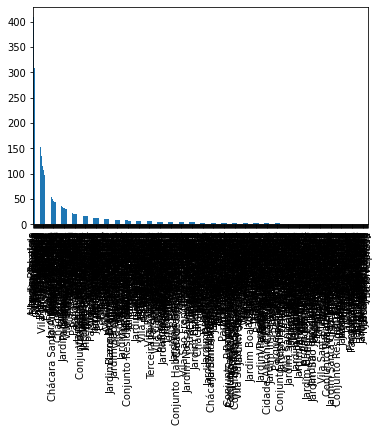

In [ ]:
amount_properties_by_district.plot.bar()

Top 10 districts with the highest number of properties

In [ ]:
# Top 10 charts
top10 = amount_properties_by_district.head(10)
top10

Alto de Pinheiros    409
Jardim Guedala       403
Jardim Paulista      309
Brooklin Paulista    247
Jardim Europa        240
Cidade Jardim        230
Vila Madalena        224
Pacaembu             222
Planalto Paulista    195
Jardim Leonor        186
Name: Bairro, dtype: int64

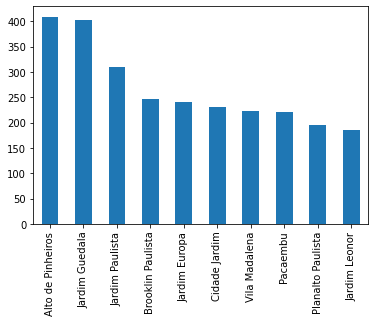

In [ ]:
top10.plot.bar()